Gravitatsion kuch hisoblash natijalari:
m1 = 5 kg, m2 = 5 kg, r = 1 m -> F = 1.67e-09 N
m1 = 5 kg, m2 = 5 kg, r = 2 m -> F = 4.17e-10 N
m1 = 5 kg, m2 = 5 kg, r = 3 m -> F = 1.85e-10 N
m1 = 5 kg, m2 = 10 kg, r = 1 m -> F = 3.34e-09 N
m1 = 5 kg, m2 = 10 kg, r = 2 m -> F = 8.34e-10 N
m1 = 5 kg, m2 = 10 kg, r = 3 m -> F = 3.71e-10 N
m1 = 5 kg, m2 = 15 kg, r = 1 m -> F = 5.01e-09 N
m1 = 5 kg, m2 = 15 kg, r = 2 m -> F = 1.25e-09 N
m1 = 5 kg, m2 = 15 kg, r = 3 m -> F = 5.56e-10 N
m1 = 10 kg, m2 = 5 kg, r = 1 m -> F = 3.34e-09 N
m1 = 10 kg, m2 = 5 kg, r = 2 m -> F = 8.34e-10 N
m1 = 10 kg, m2 = 5 kg, r = 3 m -> F = 3.71e-10 N
m1 = 10 kg, m2 = 10 kg, r = 1 m -> F = 6.67e-09 N
m1 = 10 kg, m2 = 10 kg, r = 2 m -> F = 1.67e-09 N
m1 = 10 kg, m2 = 10 kg, r = 3 m -> F = 7.42e-10 N
m1 = 10 kg, m2 = 15 kg, r = 1 m -> F = 1.00e-08 N
m1 = 10 kg, m2 = 15 kg, r = 2 m -> F = 2.50e-09 N
m1 = 10 kg, m2 = 15 kg, r = 3 m -> F = 1.11e-09 N
m1 = 15 kg, m2 = 5 kg, r = 1 m -> F = 5.01e-09 N
m1 = 15 kg, m2 = 5 kg, r =

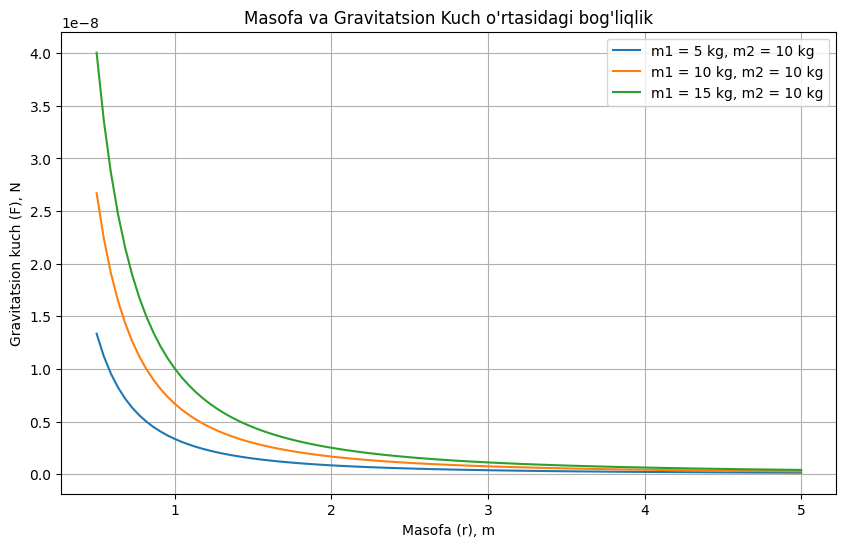

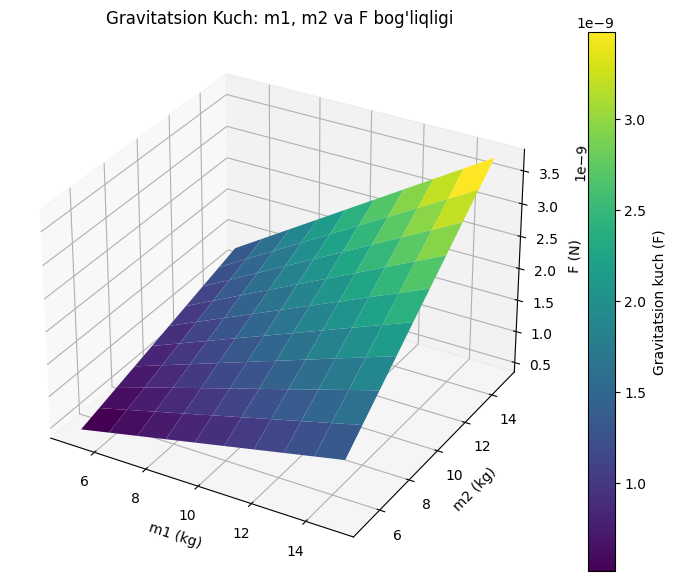

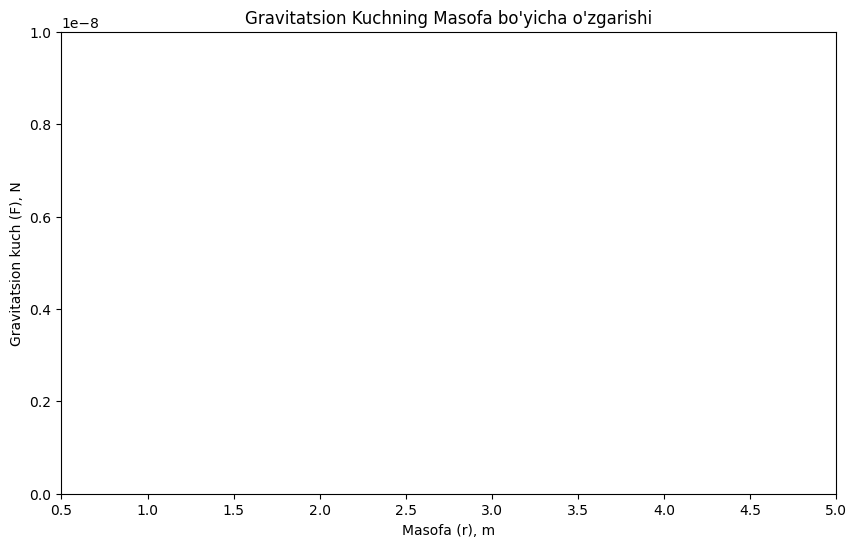


Xulosa:
1. Gravitatsion kuch jismlar massalari ortishi bilan ortadi.
2. Masofa kattalashganda gravitatsion kuch kamayadi, chunki kuch masofa kvadratiga teskari proporsional.


In [1]:
# 1. Kutubxonalarni import qilish
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# 2. Gravitatsion kuch hisoblash funksiyasi
def gravitation_force(G, m1, m2, r):
    """
    Newtonning gravitatsiya qonuni asosida kuchni hisoblash.
    G: Gravitatsion doimiy (6.674e-11 N·m²/kg²)
    m1, m2: Jismlar massalari
    r: Jismlar orasidagi masofa
    """
    return G * (m1 * m2) / (r ** 2)

# Gravitatsion doimiy
G = 6.674e-11  # N·m²/kg²

# 3. Parametrlar: Massalar va masofalar
masses = [5, 10, 15]  # kg
distances = [1, 2, 3]  # m

# 4. Gravitatsion kuchni hisoblash
forces = []

for m1 in masses:
    for m2 in masses:
        for r in distances:
            F = gravitation_force(G, m1, m2, r)
            forces.append((m1, m2, r, F))

# Hisoblangan qiymatlarni chop etish
print("Gravitatsion kuch hisoblash natijalari:")
for result in forces:
    print(f"m1 = {result[0]} kg, m2 = {result[1]} kg, r = {result[2]} m -> F = {result[3]:.2e} N")

# 5. 2D Grafik: Masofa va Gravitatsion Kuch
plt.figure(figsize=(10, 6))

for m1 in masses:
    m2 = 10  # Ikkinchi jism massasini doimiy qilib olamiz
    r_values = np.linspace(0.5, 5, 100)  # Masofa 0.5 m dan 5 m gacha
    F_values = [gravitation_force(G, m1, m2, r) for r in r_values]
    plt.plot(r_values, F_values, label=f"m1 = {m1} kg, m2 = {m2} kg")

plt.title("Masofa va Gravitatsion Kuch o'rtasidagi bog'liqlik")
plt.xlabel("Masofa (r), m")
plt.ylabel("Gravitatsion kuch (F), N")
plt.legend()
plt.grid()
plt.show()

# 6. 3D Grafik: m1, m2 va F o'zaro bog'liqligi
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Massalar va kuchlarni hisoblash
m1_values = np.linspace(5, 15, 10)
m2_values = np.linspace(5, 15, 10)
m1_grid, m2_grid = np.meshgrid(m1_values, m2_values)
r_fixed = 2  # Masofa doimiy
F_grid = gravitation_force(G, m1_grid, m2_grid, r_fixed)

# 3D Surface
surf = ax.plot_surface(m1_grid, m2_grid, F_grid, cmap='viridis', edgecolor='none')
ax.set_title("Gravitatsion Kuch: m1, m2 va F bog'liqligi")
ax.set_xlabel("m1 (kg)")
ax.set_ylabel("m2 (kg)")
ax.set_zlabel("F (N)")
fig.colorbar(surf, ax=ax, label='Gravitatsion kuch (F)')

plt.show()

# 7. Animatsiya: Masofaning o'zgarishiga mos ravishda kuch o'zgarishi
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], 'b-', lw=2)
ax.set_xlim(0.5, 5)
ax.set_ylim(0, 1e-8)
ax.set_title("Gravitatsion Kuchning Masofa bo'yicha o'zgarishi")
ax.set_xlabel("Masofa (r), m")
ax.set_ylabel("Gravitatsion kuch (F), N")

# Animatsiya funksiyasi
m1, m2 = 10, 15  # Massalar
def update(frame):
    r_values = np.linspace(0.5, frame, 100)
    F_values = [gravitation_force(G, m1, m2, r) for r in r_values]
    line.set_data(r_values, F_values)
    return line,

ani = FuncAnimation(fig, update, frames=np.linspace(0.5, 5, 50), interval=100, blit=True)
plt.show()

# 8. Xulosa va Tahlil
print("\nXulosa:")
print(f"1. Gravitatsion kuch jismlar massalari ortishi bilan ortadi.")
print(f"2. Masofa kattalashganda gravitatsion kuch kamayadi, chunki kuch masofa kvadratiga teskari proporsional.")
